<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/week_5_asssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [10]:
X, y

(array([[  2.47475454,   0.40165523,   1.68081787, ...,  -6.59044146,
          -2.21290585,  -3.139579  ],
        [  0.84802507,   2.81841945,  -2.76008732, ...,   3.00844461,
           0.78661954,  -1.27681551],
        [ -1.90041246,  -0.56901823,  -1.76220236, ...,   3.37336417,
          -2.28613707,   1.90344983],
        ...,
        [  0.7673844 ,  -2.91920559,   2.80851577, ...,   4.42591832,
           0.46321196,  -3.30523346],
        [  2.05510667,  -0.99009741,   0.73577291, ...,   3.05100898,
          -1.40715279,  -0.51579331],
        [-10.96847792,  -2.39810735,  -0.96700953, ..., -11.16298557,
           1.16646392,   0.60835176]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 

In [11]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
?KFold

In [12]:
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.868 (0.032)


In [13]:
# prepare the cross-validation procedure
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [14]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.867 (0.031)


>1 mean=0.8680 se=0.011
>2 mean=0.8675 se=0.008
>3 mean=0.8673 se=0.006
>4 mean=0.8670 se=0.006
>5 mean=0.8658 se=0.005
>6 mean=0.8655 se=0.004
>7 mean=0.8651 se=0.004
>8 mean=0.8651 se=0.004
>9 mean=0.8656 se=0.003
>10 mean=0.8658 se=0.003
>11 mean=0.8655 se=0.003
>12 mean=0.8654 se=0.003
>13 mean=0.8652 se=0.003
>14 mean=0.8651 se=0.003
>15 mean=0.8653 se=0.003


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


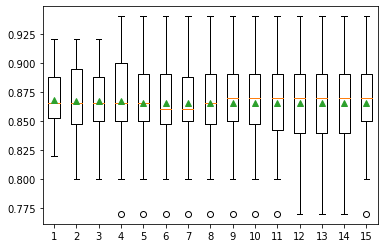

In [15]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = LogisticRegression()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [22]:
?cross_val_score

In [20]:
#trying to increase accuracy by changing the model
def evaluate_model(model, X, y, repeats, n_splits):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=n_splits, n_repeats=repeats, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


>1 mean=0.9190 se=0.008
>2 mean=0.9145 se=0.006
>3 mean=0.9223 se=0.005
>4 mean=0.9197 se=0.005
>5 mean=0.9222 se=0.004
>6 mean=0.9173 se=0.003
>7 mean=0.9226 se=0.003
>8 mean=0.9183 se=0.003
>9 mean=0.9201 se=0.003
>10 mean=0.9215 se=0.002
>11 mean=0.9195 se=0.003
>12 mean=0.9210 se=0.002
>13 mean=0.9188 se=0.002
>14 mean=0.9214 se=0.002
>15 mean=0.9193 se=0.002


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


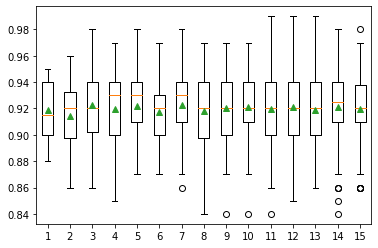

In [23]:
#changed the model from logistic regression to random forest. 
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
# create model
model = RandomForestClassifier()

for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(model, X, y, r, 10)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

>1 mean=0.9210 se=0.007
>2 mean=0.9120 se=0.008
>3 mean=0.9167 se=0.005
>4 mean=0.9185 se=0.004
>5 mean=0.9172 se=0.004
>6 mean=0.9180 se=0.003
>7 mean=0.9171 se=0.003
>8 mean=0.9158 se=0.003
>9 mean=0.9127 se=0.003
>10 mean=0.9126 se=0.003
>11 mean=0.9162 se=0.003
>12 mean=0.9156 se=0.003
>13 mean=0.9162 se=0.002
>14 mean=0.9141 se=0.002
>15 mean=0.9159 se=0.002


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


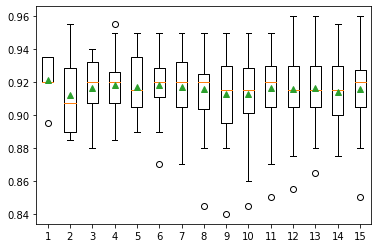

In [24]:
#changed the model from logistic regression to random forest and reduced splits 
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
# create model
model = RandomForestClassifier()

for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(model, X, y, r, 5)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()